In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data('/content/drive/MyDrive/Colab Notebooks/Datasets/Digit recog/Dataset/sample_submission.csv')

In [4]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
#Build the CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model with appropriate loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 52s 66ms/step - loss: 0.2639 - accuracy: 0.9196 - val_loss: 0.0641 - val_accuracy: 0.9820
Epoch 2/2
750/750 [==============================] - 46s 62ms/step - loss: 0.0921 - accuracy: 0.9739 - val_loss: 0.0511 - val_accuracy: 0.9849


In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

# Print the test accuracy
print("Test accuracy:", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0437 - accuracy: 0.9859
Test accuracy: 0.9858999848365784


313/313 [==============================] - 6s 20ms/step


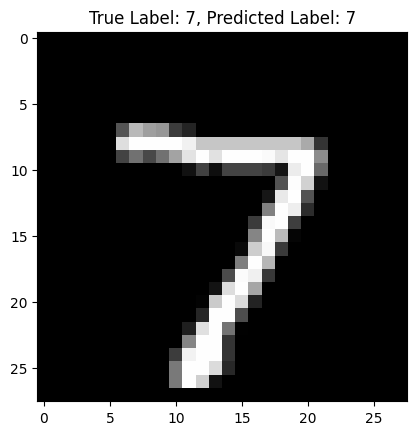

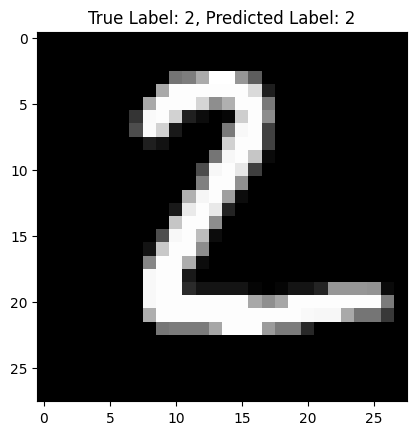

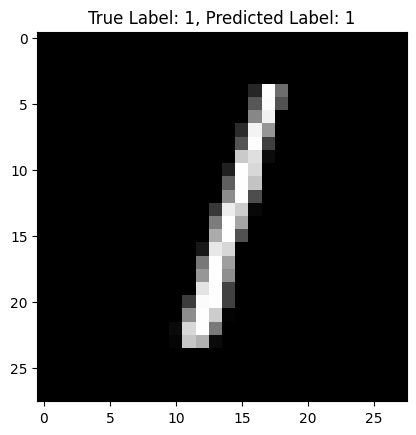

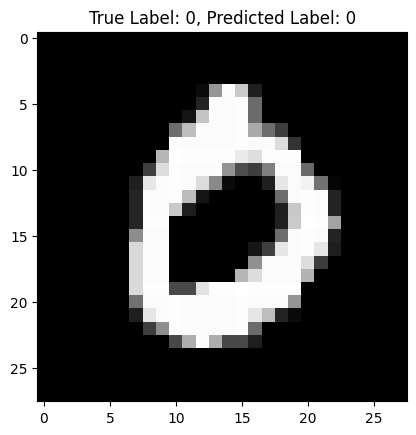

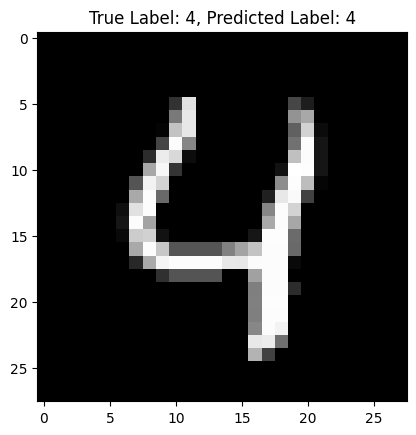

In [9]:
# Predict digit images from the test set
predictions = model.predict(X_test.reshape(-1, 28, 28, 1))

# Display a few sample predictions with their true labels
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()